In [4]:
# Importing libraries
import pandas as pd
def recommendation():
    
    # Read csv file into a pandas dataframe
    df = pd.read_csv("books.csv")
    df = df[df.language_code =='eng']
    df['Title'] = df['title'].str.split('(').str[0]
    print("Enter rating w/wo <rating> or random for book suggestion")
    search= input("enter to search ")
    if search=="random":
        df_new= df.sample(replace=True)[['Title', 'authors',"rating"]]
        print("Title: ", df_new[['Title']].to_string(index=False, header=False))
        print("Author: ", df_new[['authors']].to_string(index=False, header=False))
        print("Rating: ", df_new[['rating']].to_string(index=False, header=False))
        return "Enjoy!"
    else:
        if "rating" in search:
            search=search.split()
            rate=float(search[1])
            
            if rate < 0 or rate > 5:
                print("Error: Enter rating between 0 and 5")
                return "Please Correct"
            else:
                df_rate = df[df['rating'].astype(float) >= rate]
                df_new= df_rate.sample(replace=True)[['Title', 'authors',"rating"]]
                print("Title: ", df_new[['Title']].to_string(index=False, header=False))
                print("Author: ", df_new[['authors']].to_string(index=False, header=False))
                print("Rating: ", df_new[['rating']].to_string(index=False, header=False))
                return "Enjoy!"
print(recommendation())

Enter rating w/wo <rating> or random for book suggestion
enter to search random
Title:  Constructing the Little House: Gender  Culture  and Laura Ingalls Wilder
Author:  Ann Romines
Rating:  3.7
Enjoy!


('Ross Garnaut', 5.0)
('James E. Campbell', 5.0)
('Sara Barton-Wood', 5.0)
('William C. Dowling', 5.0)
('Julie Sylvester/David Sylvester', 5.0)
['Ross Garnaut', 'James E. Campbell', 'Sara Barton-Wood', 'William C. Dowling', 'Julie Sylvester/David Sylvester']
[5.0, 5.0, 5.0, 5.0, 5.0]


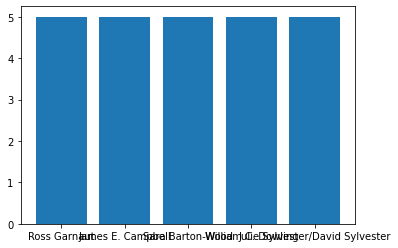

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
def visual():
    # Read csv file into a pandas dataframe
    df = pd.read_csv("books.csv")
    df = df[df.language_code =='eng']
    auth = list(set(df['authors']))
    authdict = {}
    j=0
    for i in auth:
        df1 = df[df['authors'] == i]
        r = list(df1['rating'])
        rate = [eval(x) for x in list(df1['rating'])]
        authdict[i] = sum(rate)/len(rate)
    hi = list(authdict.values())
    hi.sort(reverse = True)
    keys = list(authdict.keys())
    vals = list(authdict.values())
    names = []
    ratings = []
    a = sorted(authdict.items(), key=lambda x: x[1], reverse = True)    
    for i in range(5):
        print(a[i])
        names.append(a[i][0])
        ratings.append(a[i][1])
    plt.bar(names,ratings)
    plt.show()
visual()
